# Logistic regression, from scratch

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,6) 

import logistic as lr

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

In [5]:
import importlib
importlib.reload(lr)

<module 'logistic' from '/Users/andrewenfield/work/github/Data558/CodeSubmission/logistic.py'>

# Logistic regression with simple simulated data

In [49]:
np.random.seed(42)

In [50]:
size_of_each_class = 50
X = np.append(np.random.normal(-1, size=size_of_each_class), 
              np.random.normal(1, size=size_of_each_class))[:, np.newaxis]
X.shape

(100, 1)

In [51]:
# keep this? standardizing means that we don't need an intercept, right?
X = scale(X)

In [52]:
y = np.append(np.repeat(-1, size_of_each_class), np.repeat(1, size_of_each_class))
y.shape

(100,)

In [53]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
all_coefs = lr.fastgradalgo(X_train, y_train, 0.01, 
                lr.compute_gradient_logistic_regression, 
                lr.compute_objective_logistic_regression, 
                lam=1, max_iter=300)
final_coefs = lr.get_final_coefs(all_coefs)
final_coefs

array([[ 0.18397433]])

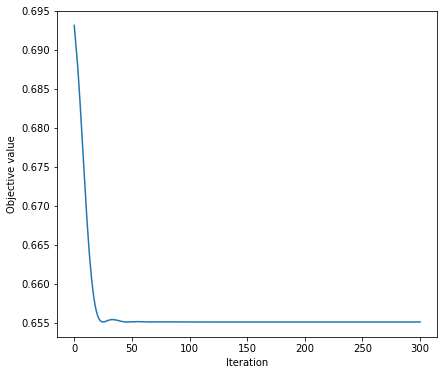

In [56]:
lr.objective_plot(all_coefs, X_train, y_train)

In [58]:
print("Accuracy on this simulated data is {:.0%}.".format(accuracy_score(y_test, lr.get_y_pred(final_coefs, X_test))))

Accuracy on this simulated data is 80%.
